In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Settings

In [3]:
savefig = True
output_dir = "../figs/review"

## Load summary tables

In [4]:
br_df = pd.read_csv("../summary_tables/2021-02-01_corr-bite_rate_per_v.csv")
gamma_df = pd.read_csv("../summary_tables/2021-02-01_corr-gamma.csv")
nv_df = pd.read_csv("../summary_tables/2021-02-01_corr-nv.csv")

In [5]:
# Restrict to equilibrium epoch
br_df = br_df.query("epoch == 'InitVar'")
gamma_df = gamma_df.query("epoch == 'InitVar'")
nv_df = nv_df.query("epoch == 'InitVar'")

# Remove E[X_h] <= 0.2; as there is considerable extinction here
# br_df = br_df.query("HX_expected > 0.11")
# gamma_df = gamma_df.query("HX_expected > 0.11")
# nv_df = nv_df.query("HX_expected > 0.11")

In [6]:
print("Tajima's D null samples: %d" % nv_df["tajd"].isnull().sum())
nv_df.dropna(inplace=True)  # for one experiment, we briefly got to <4 samples, making Tajima's D nan; drop

Tajima's D null samples: 3


## Boxplots

## Selected, for main

In [7]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
    "l_ibd": "Avg. IBD\nTrack Length (bp)"
})

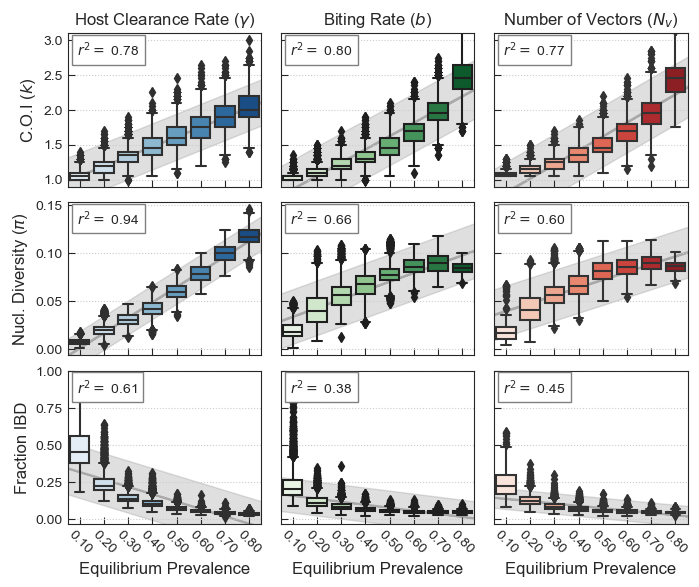

In [8]:
n_expts = 3
view_x_h = "HX_expected"
view_metrics = ["mean_k", "pi", "f_ibd"]
n_view_metrics = len(view_metrics)

fig, ax = plt.subplots(n_view_metrics, n_expts, figsize=(8, 6.5), sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, metric in enumerate(view_metrics):
    # Boxplots
    regress_boxplot(metric, view_x_h, gamma_df, ax[i, 0], palette="Blues")
    regress_boxplot(metric, view_x_h, br_df, ax[i, 1], palette="Greens")
    regress_boxplot(metric, view_x_h, nv_df, ax[i, 2], palette="Reds")
    
    # Labels    
    for j in np.arange(n_expts):
        # x
        if i == n_view_metrics-1:
            ax[i, j].set_xticklabels(["%.02f" % float(f.get_text()) 
                                      for f in ax[i, j].get_xticklabels()],
                                     rotation=-45)
            ax[i, j].set_xlabel("Equilibrium Prevalence", fontsize=12)
        else:
            ax[i, j].set_xlabel("")
        
        # y
        if j == 0:
            ax[i, j].set_ylabel(genetic_names[metric], fontsize=12)
        else:
            ax[i, j].set_ylabel("")
            
        # Ticks & Grid
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=5)
        #ax[i, j].tick_params(axis='y', which='minor', direction='in', length=5, labelsize=8, gridOn=True)
        ax[i, j].grid(axis='y', linestyle='dotted')
    
    
ax[0, 0].set_title("Host Clearance Rate ($\gamma$)")
ax[0, 1].set_title("Biting Rate ($b$)")
ax[0, 2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_main.png"), 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_main.pdf"), 
                bbox_inches="tight", pad_inches=0.5)

### Mixed infection related, supplement

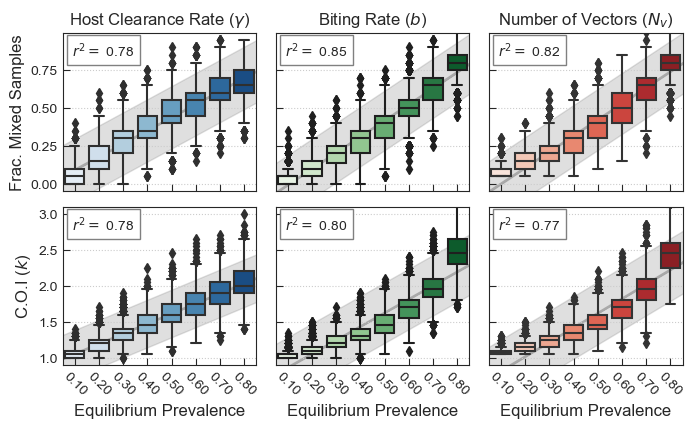

In [9]:
n_expts = 3
view_x_h = "HX_expected"
view_metrics = ["frac_mixed_samples", "mean_k"]
n_view_metrics = len(view_metrics)

fig, ax = plt.subplots(n_view_metrics, n_expts, figsize=(8, 2.2*n_view_metrics), 
                       sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, metric in enumerate(view_metrics):
    # Boxplots
    regress_boxplot(metric, view_x_h, gamma_df, ax[i, 0], palette="Blues")
    regress_boxplot(metric, view_x_h, br_df, ax[i, 1], palette="Greens")
    regress_boxplot(metric, view_x_h, nv_df, ax[i, 2], palette="Reds")
    
    # Labels    
    for j in np.arange(n_expts):
        # x
        if i == n_view_metrics-1:
            ax[i, j].set_xticklabels(["%.02f" % float(f.get_text()) 
                                      for f in ax[i, j].get_xticklabels()],
                                     rotation=-45)
            ax[i, j].set_xlabel("Equilibrium Prevalence", fontsize=12)
        else:
            ax[i, j].set_xlabel("")
        
        # y
        if j == 0:
            ax[i, j].set_ylabel(genetic_names[metric], fontsize=12)
        else:
            ax[i, j].set_ylabel("")
            
        # Ticks & Grid
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=5)
        #ax[i, j].tick_params(axis='y', which='minor', direction='in', length=5, labelsize=8, gridOn=True)
        ax[i, j].grid(axis='y', linestyle='dotted')
    
    
ax[0, 0].set_title("Host Clearance Rate ($\gamma$)")
ax[0, 1].set_title("Biting Rate ($b$)")
ax[0, 2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_sm-mi.png"), 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_sm-mi.pdf"), 
                bbox_inches="tight", pad_inches=0.5)

### Genealogy (~$N_e$) related, supplement

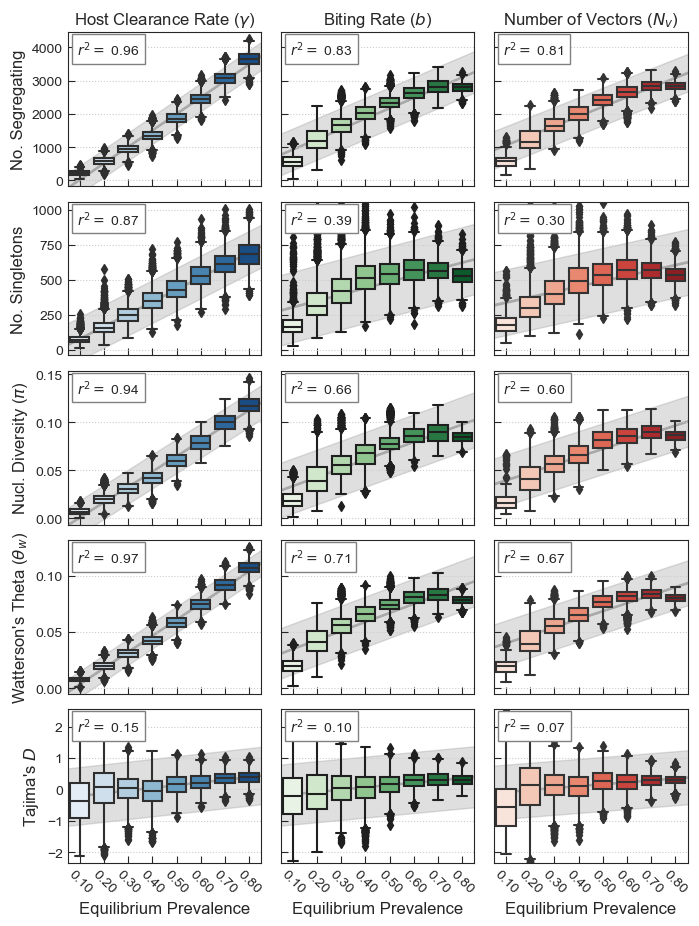

In [10]:
n_expts = 3
view_x_h = "HX_expected"
view_metrics = ["n_segregating", "n_singletons", "pi", "theta", "tajd"]
n_view_metrics = len(view_metrics)

fig, ax = plt.subplots(n_view_metrics, n_expts, figsize=(8, 2.2*n_view_metrics), 
                       sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, metric in enumerate(view_metrics):
    # Boxplots
    regress_boxplot(metric, view_x_h, gamma_df, ax[i, 0], palette="Blues")
    regress_boxplot(metric, view_x_h, br_df, ax[i, 1], palette="Greens")
    regress_boxplot(metric, view_x_h, nv_df, ax[i, 2], palette="Reds")
    
    # Labels    
    for j in np.arange(n_expts):
        # x
        if i == n_view_metrics-1:
            ax[i, j].set_xticklabels(["%.02f" % float(f.get_text()) 
                                      for f in ax[i, j].get_xticklabels()],
                                     rotation=-45)
            ax[i, j].set_xlabel("Equilibrium Prevalence", fontsize=12)
        else:
            ax[i, j].set_xlabel("")
        
        # y
        if j == 0:
            ax[i, j].set_ylabel(genetic_names[metric], fontsize=12)
        else:
            ax[i, j].set_ylabel("")
            
        # Ticks & Grid
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=5)
        #ax[i, j].tick_params(axis='y', which='minor', direction='in', length=5, labelsize=8, gridOn=True)
        ax[i, j].grid(axis='y', linestyle='dotted')
    
    
ax[0, 0].set_title("Host Clearance Rate ($\gamma$)")
ax[0, 1].set_title("Biting Rate ($b$)")
ax[0, 2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_sm-ne.png"), 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_sm-ne.pdf"), 
                bbox_inches="tight", pad_inches=0.5)

### IBD related, supplement

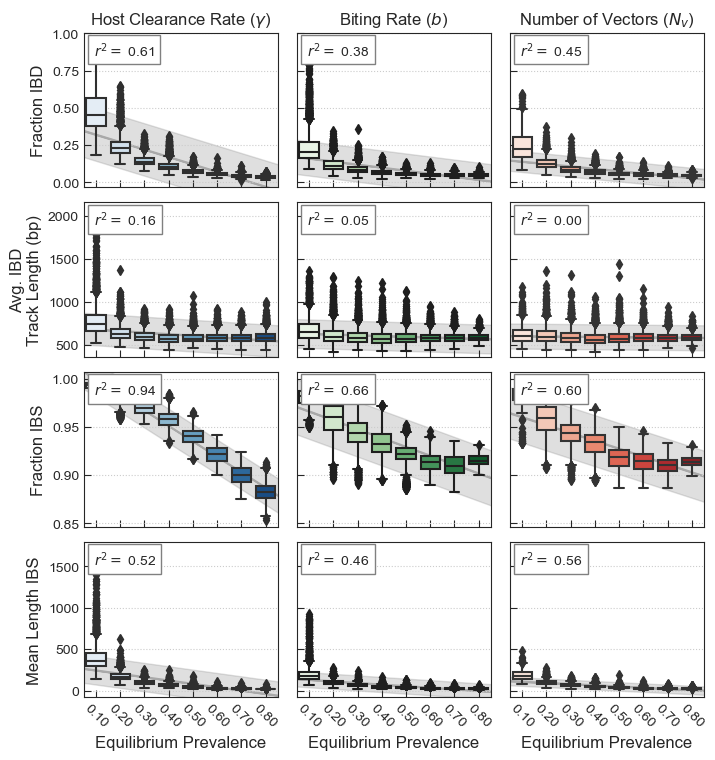

In [11]:
n_expts = 3
view_x_h = "HX_expected"
view_metrics = ["f_ibd", "l_ibd", "f_ibs", "l_ibs"]
n_view_metrics = len(view_metrics)

fig, ax = plt.subplots(n_view_metrics, n_expts, figsize=(8, 2.2*n_view_metrics), 
                       sharex=True, sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, metric in enumerate(view_metrics):
    # Boxplots
    regress_boxplot(metric, view_x_h, gamma_df, ax[i, 0], palette="Blues")
    regress_boxplot(metric, view_x_h, br_df, ax[i, 1], palette="Greens")
    regress_boxplot(metric, view_x_h, nv_df, ax[i, 2], palette="Reds")
    
    # Labels    
    for j in np.arange(n_expts):
        # x
        if i == n_view_metrics-1:
            ax[i, j].set_xticklabels(["%.02f" % float(f.get_text()) 
                                      for f in ax[i, j].get_xticklabels()],
                                     rotation=-45)
            ax[i, j].set_xlabel("Equilibrium Prevalence", fontsize=12)
        else:
            ax[i, j].set_xlabel("")
        
        # y
        if j == 0:
            ax[i, j].set_ylabel(genetic_names[metric], fontsize=12)
        else:
            ax[i, j].set_ylabel("")
            
        # Ticks & Grid
        ax[i, j].tick_params(axis='both', which='major', direction='in', length=5)
        #ax[i, j].tick_params(axis='y', which='minor', direction='in', length=5, labelsize=8, gridOn=True)
        ax[i, j].grid(axis='y', linestyle='dotted')
    
    
ax[0, 0].set_title("Host Clearance Rate ($\gamma$)")
ax[0, 1].set_title("Biting Rate ($b$)")
ax[0, 2].set_title("Number of Vectors ($N_v$)")

if savefig:
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_sm-ibd.png"), 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec2_boxplots_sm-ibd.pdf"), 
                bbox_inches="tight", pad_inches=0.5)